# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
- 목표 : MSE 손실함수값 3000 이하를 달성

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


In [2]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
train_X = diabetes.data
train_y = diabetes.target

In [ ]:
print(train_X.shape)
print(train_y.shape)

(442, 10)
(442,)


In [5]:
#feature 정보 확인

print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# X 값 -.2<feature<.2 분포, y 값 25<target<346 분포
print('<x_data[0]> : ',train_X[0])
print()
print('<y_data[0]> : ',train_y[0])

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]

<y_data[0]> :  151.0


In [ ]:
# train/test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [ ]:
# 다중 선형 회귀 함수 구현 및 전체 코드

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.b_history = []
    
    # y_pred = w1*x1 + w2*x2 + ... + wN*xN + b  
    def forward(self, x):
        y_pred = np.dot(x, self.w) + self.b
        return y_pred
    
    # MSE loss
    def loss(self, X, y):
        y_pred = self.forward(X)
        return ((y_pred - y) ** 2).mean()
    
    # gradient descent
    def gradient_descent(self, X, y):
        N = len(y)
        y_pred = self.forward(X)
        w_grad = (2/N) * np.dot(X.T, (y_pred - y))
        b_grad = (2/N) * np.sum(y_pred - y)
        
        return w_grad, b_grad
    
    # 학습 함수
    def train(self, train_X, train_y, epochs=100):
        # w, b 초기화
        self.w = np.ones(train_X.shape[1])
        self.b = 0
        
        for i in range(epochs):
            # loss
            l = self.loss(train_X, train_y)  
            
            # gradient descent 계산
            w_grad, b_grad = self.gradient_descent(train_X, train_y)
            
            # 업데이트 w, b
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
                
            print(f'Epoch ({i+1}) : loss = {l:.5f}')
            self.losses.append(l)
            self.w_history.append(self.w)
            self.b_history.append(self.b)

In [9]:
model = MultipleLinearRegression(learning_rate=0.01)
model.train(X_train,y_train)

Epoch (1) : loss = 29690.32988
Epoch (2) : loss = 28753.48911
Epoch (3) : loss = 27853.71662
Epoch (4) : loss = 26989.54449
Epoch (5) : loss = 26159.56294
Epoch (6) : loss = 25362.41801
Epoch (7) : loss = 24596.80937
Epoch (8) : loss = 23861.48818
Epoch (9) : loss = 23155.25504
Epoch (10) : loss = 22476.95805
Epoch (11) : loss = 21825.49095
Epoch (12) : loss = 21199.79127
Epoch (13) : loss = 20598.83861
Epoch (14) : loss = 20021.65299
Epoch (15) : loss = 19467.29322
Epoch (16) : loss = 18934.85541
Epoch (17) : loss = 18423.47143
Epoch (18) : loss = 17932.30757
Epoch (19) : loss = 17460.56309
Epoch (20) : loss = 17007.46900
Epoch (21) : loss = 16572.28673
Epoch (22) : loss = 16154.30698
Epoch (23) : loss = 15752.84853
Epoch (24) : loss = 15367.25714
Epoch (25) : loss = 14996.90447
Epoch (26) : loss = 14641.18707
Epoch (27) : loss = 14299.52538
Epoch (28) : loss = 13971.36281
Epoch (29) : loss = 13656.16478
Epoch (30) : loss = 13353.41791
Epoch (31) : loss = 13062.62914
Epoch (32) : loss

In [11]:
y_pred = model.forward(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse:.5f}')

Test MSE: 5363.33481


## Target값 정규화 진행 후 model 학습

In [12]:
X = diabetes.data
y = diabetes.target

# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# y 값 스케일링
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
# 다중 선형 회귀 함수 구현 및 전체 코드

class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.b_history = []
    
    # y_pred = w1*x1 + w2*x2 + ... + wN*xN + b    
    def forward(self, x):
        y_pred = np.dot(x, self.w) + self.b
        return y_pred
    
    # MSE loss
    def loss(self, X, y):
        y_pred = self.forward(X)
        return ((y_pred - y) ** 2).mean()
    
    # gradient descent
    def gradient_descent(self, X, y):
        N = len(y)
        y_pred = self.forward(X)
        w_grad = (2/N) * np.dot(X.T, (y_pred - y))
        b_grad = (2/N) * np.sum(y_pred - y)
        
        return w_grad, b_grad
    
    # 학습 함수
    def train(self, train_X, train_y, epochs=100):
        # w, b 초기화
        self.w = np.ones(train_X.shape[1])
        self.b = 0
        
        for i in range(epochs):
            # loss
            l = self.loss(train_X, train_y)  
            
            # gradient descent 계산
            w_grad, b_grad = self.gradient_descent(train_X, train_y)
            
            # 업데이트 w, b
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
                
            print(f'Epoch ({i+1}) : loss = {l:.5f}')
            self.losses.append(l)
            self.w_history.append(self.w)
            self.b_history.append(self.b)

In [14]:
# 모델 생성 및 학습
model = MultipleLinearRegression(learning_rate=0.01)
model.train(X_train, y_train_scaled)


Epoch (1) : loss = 0.81640
Epoch (2) : loss = 0.81633
Epoch (3) : loss = 0.81627
Epoch (4) : loss = 0.81621
Epoch (5) : loss = 0.81615
Epoch (6) : loss = 0.81609
Epoch (7) : loss = 0.81603
Epoch (8) : loss = 0.81597
Epoch (9) : loss = 0.81591
Epoch (10) : loss = 0.81585
Epoch (11) : loss = 0.81579
Epoch (12) : loss = 0.81573
Epoch (13) : loss = 0.81567
Epoch (14) : loss = 0.81561
Epoch (15) : loss = 0.81555
Epoch (16) : loss = 0.81549
Epoch (17) : loss = 0.81543
Epoch (18) : loss = 0.81537
Epoch (19) : loss = 0.81531
Epoch (20) : loss = 0.81525
Epoch (21) : loss = 0.81519
Epoch (22) : loss = 0.81513
Epoch (23) : loss = 0.81507
Epoch (24) : loss = 0.81501
Epoch (25) : loss = 0.81495
Epoch (26) : loss = 0.81489
Epoch (27) : loss = 0.81483
Epoch (28) : loss = 0.81477
Epoch (29) : loss = 0.81471
Epoch (30) : loss = 0.81465
Epoch (31) : loss = 0.81459
Epoch (32) : loss = 0.81453
Epoch (33) : loss = 0.81448
Epoch (34) : loss = 0.81442
Epoch (35) : loss = 0.81436
Epoch (36) : loss = 0.81430
E

In [21]:
# 예측 및 성능 평가
y_pred_scaled = model.forward(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# mse = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f'Test MSE: {mse:.5f}')

Test MSE: 0.69834


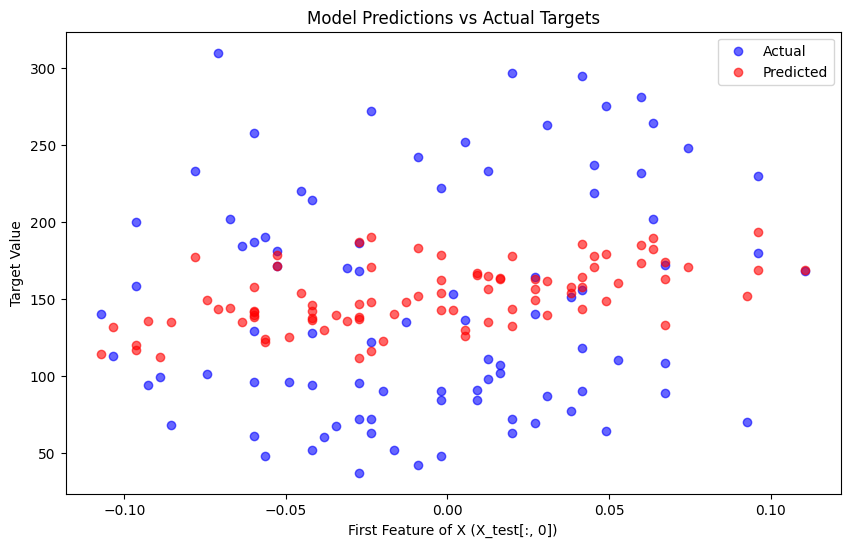

In [19]:
# 시각화
import matplotlib.pyplot as plt

X_first_col = X_test[:, 0]
plt.figure(figsize=(10, 6))
plt.scatter(X_first_col, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_first_col, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('First Feature of X (X_test[:, 0])')
plt.ylabel('Target Value')
plt.title('Model Predictions vs Actual Targets')
plt.legend()
plt.show()

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
- RMSE 값 150 이하를 달성

In [114]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime 
import warnings
warnings.filterwarnings('ignore')



In [115]:
train = pd.read_csv('/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/any/bike_train.csv')
test = pd.read_csv('/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/any/bike_test.csv')

display(train.head(), test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [116]:
#데이터 셋 내에 있는 컬럼 속성들에 대한 설명

"""
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter : 중요
holiday - whether the day is considered a holiday :중요
workingday - whether the day is neither a weekend nor holiday : 중요
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy - 쾌청
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - 흐림
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - 비,눈
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - 재해
temp - temperature in Celsius : 중요
atemp - "feels like" temperature in Celsius - 체감온도 - 온도보다 더 중요
humidity - relative humidity : 중요
windspeed - wind speed 
casual - number of non-registered user rentals initiated -비회원의 대여횟수
registered - number of registered user rentals initiated -회원의 대여횟수
count - number of total rentals -총 대여횟수
-- 날씨 관련 feature들을 활용한 대여 예측
"""

#훈련 데이터셋의 각 컬럼별 데이터타입 및 값의 갯수 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 전처리 및 EDA

In [117]:
#datetime속성을 분리하여 추출속성으로 활용하기 위해 split함수를 사용하여 년-월-일 과 시간을 분리한다.

train['tempDate'] = train.datetime.apply(lambda x:x.split())
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
train['tempDate'] = pd.to_datetime(train['datetime'])

In [118]:
train['year'] = train['tempDate'].dt.year
train['month'] = train['tempDate'].dt.month
train['day'] = train['tempDate'].dt.day
train['hour'] = train['tempDate'].dt.hour
train['minute'] = train['tempDate'].dt.minute
train['second'] = train['tempDate'].dt.second

In [119]:
train = train.drop(['tempDate'], axis=1)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,2011,1,1,4,0,0


## 시각화

<Axes: xlabel='second', ylabel='count'>

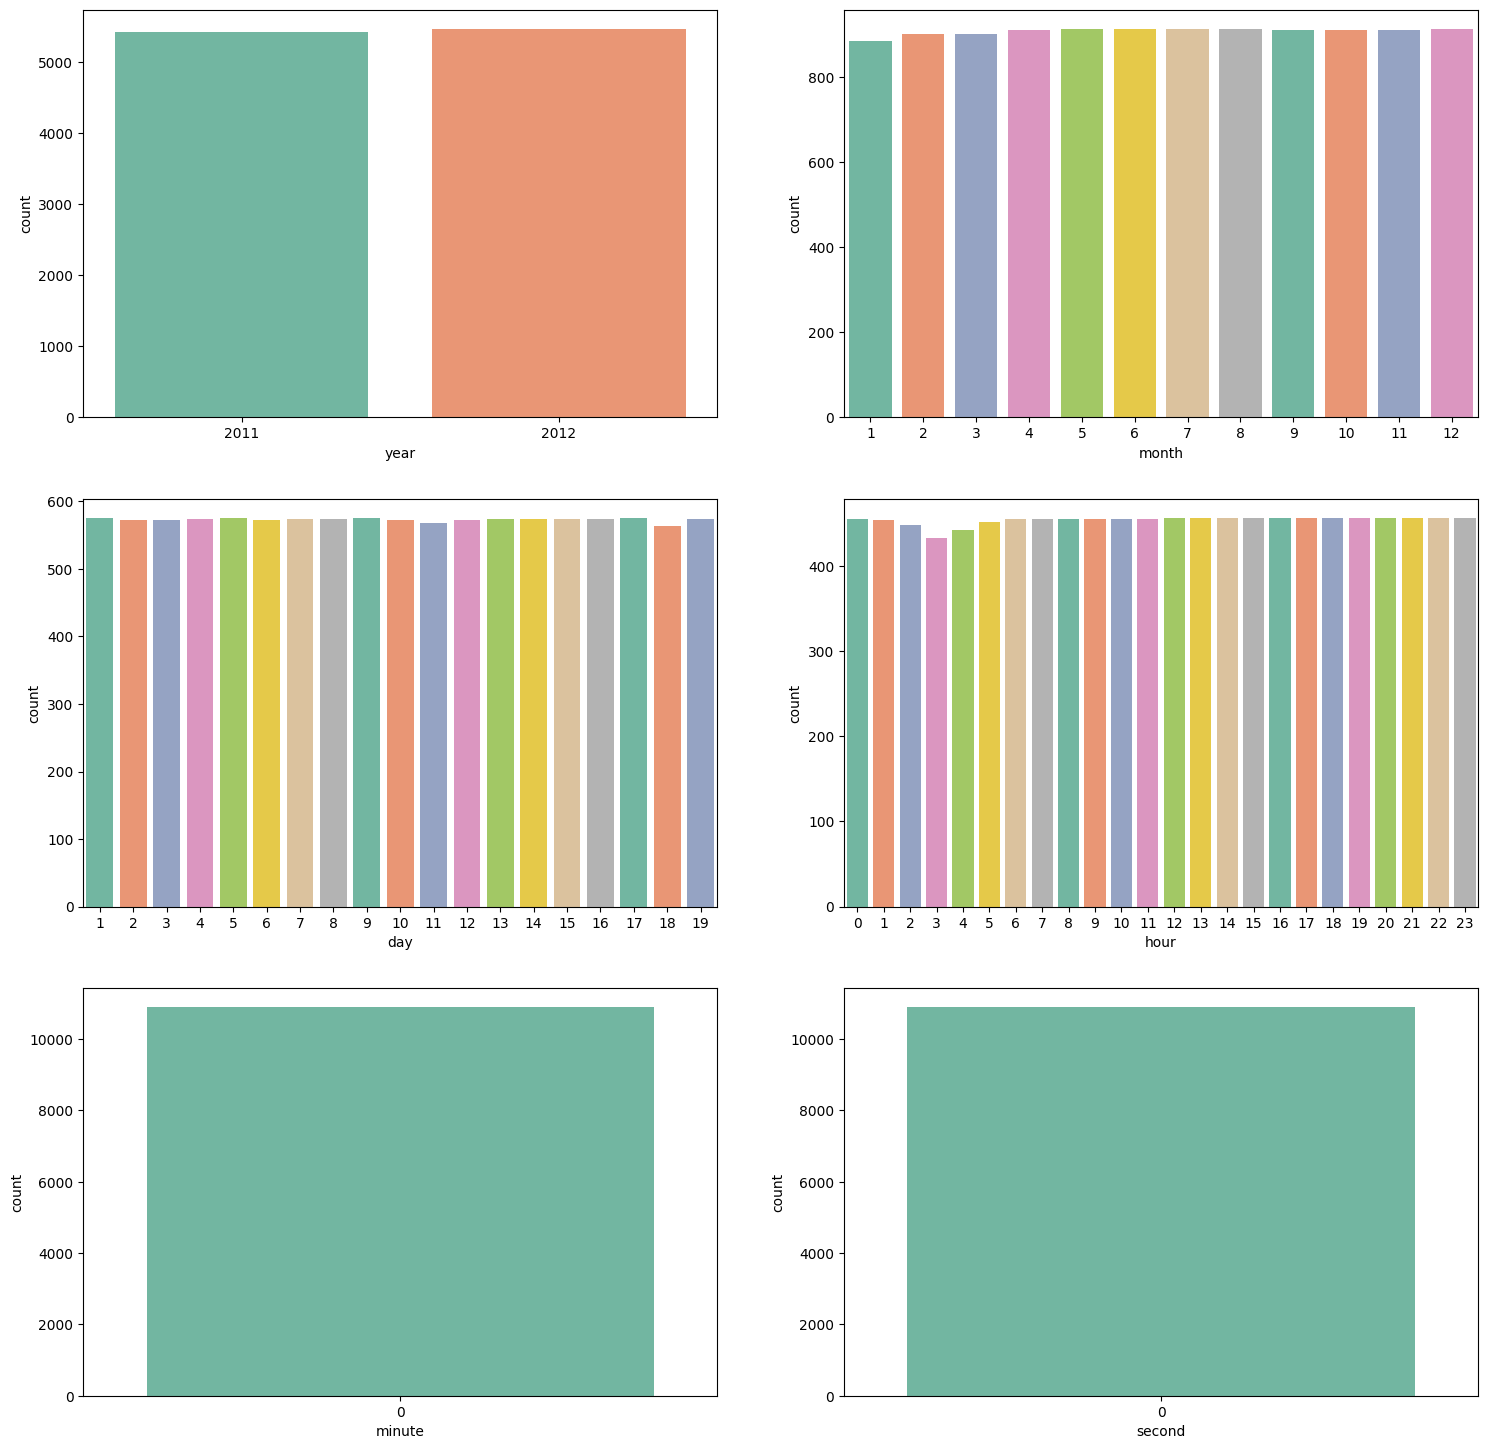

In [120]:
# 시각화 - year, month, day, hour, minute, second countplot

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(18, 18)

sns.countplot(data=train, x='year', ax=axes[0][0], palette='Set2')
sns.countplot(data=train, x='month', ax=axes[0][1], palette='Set2')
sns.countplot(data=train, x='day', ax=axes[1][0], palette='Set2')
sns.countplot(data=train, x='hour', ax=axes[1][1], palette='Set2')
sns.countplot(data=train, x='minute', ax=axes[2][0], palette='Set2')
sns.countplot(data=train, x='second', ax=axes[2][1], palette='Set2')

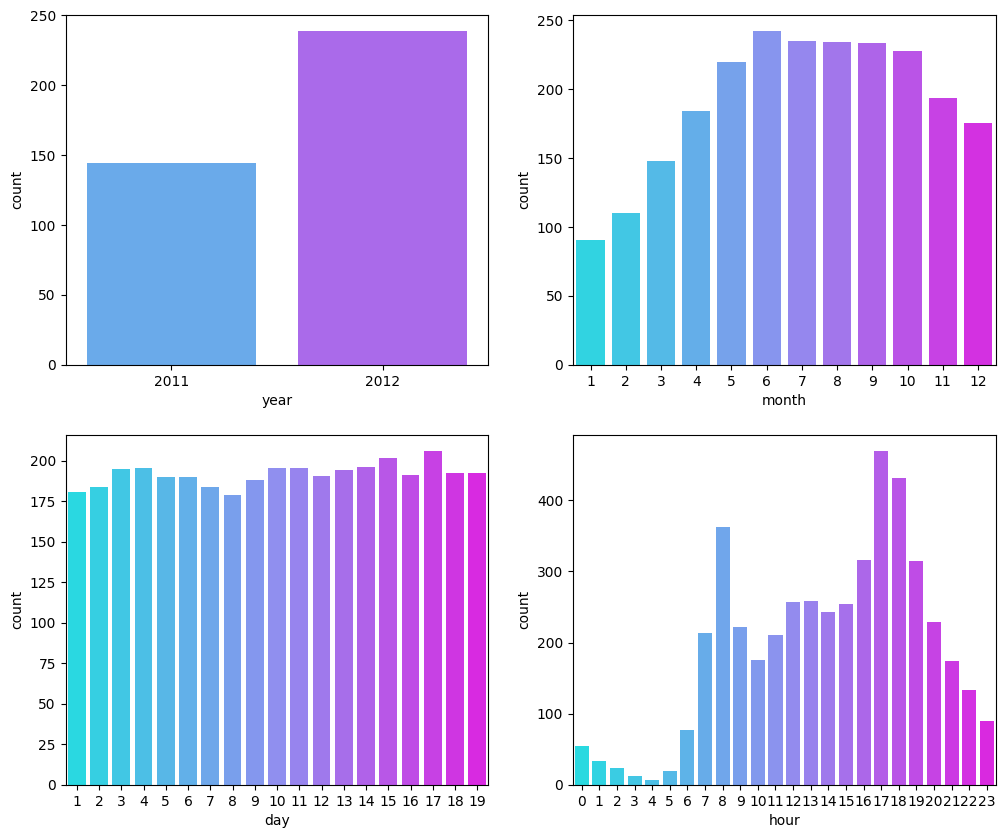

In [121]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

#년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index(),palette='cool')

#month와 count - 추운겨울보다 따뜻한 봄,여름,가을에 대여량이 많음
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index(),palette='cool')

#day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index(),palette='cool')

#hour와 count - 출퇴근 시간에 대여량이 많음:8시, 17시
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index(),palette='cool')

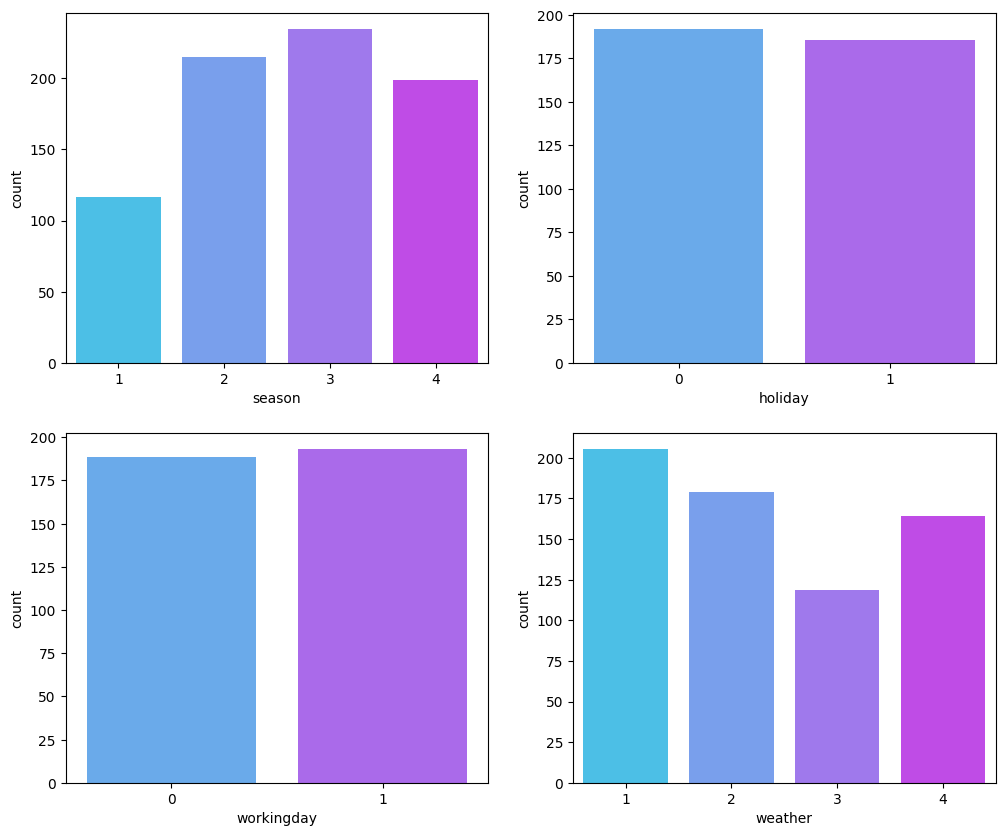

In [122]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index(),palette='cool')

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index(),palette='cool')

#작업일 여부와 count 
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index(),palette='cool')

#날씨와 count 
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index(),palette='cool')

In [123]:
# season이 1인경우
display(train[train.season == 1].head(), train[train.season == 1].tail())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,2011,1,1,4,0,0


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour,minute,second
6780,2012-03-19 19:00:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549,Monday,2012,3,19,19,0,0
6781,2012-03-19 20:00:00,1,0,1,1,24.60,30.305,64,15.0013,34,296,330,Monday,2012,3,19,20,0,0
6782,2012-03-19 21:00:00,1,0,1,1,24.60,30.305,64,11.0014,33,190,223,Monday,2012,3,19,21,0,0
6783,2012-03-19 22:00:00,1,0,1,2,22.96,26.515,73,11.0014,17,131,148,Monday,2012,3,19,22,0,0
6784,2012-03-19 23:00:00,1,0,1,2,22.96,26.515,78,8.9981,9,45,54,Monday,2012,3,19,23,0,0


In [124]:
def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

# season 재정의
train['season'] = train.month.apply(badToRight)

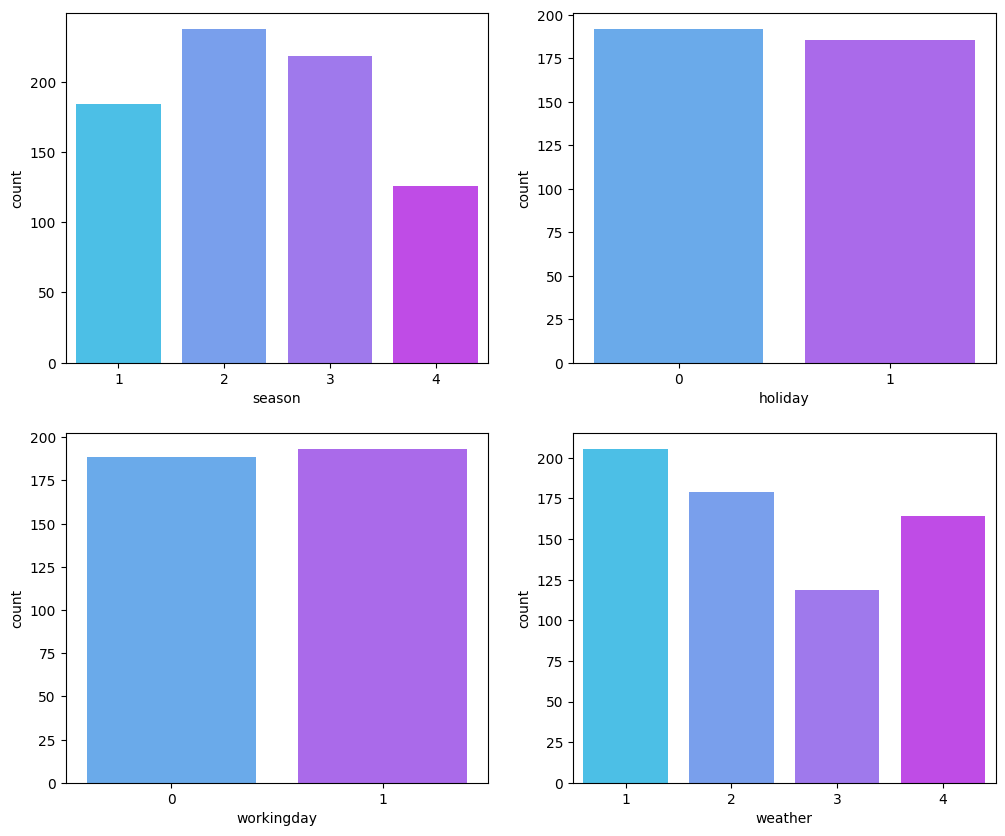

In [125]:
#계절과 count - 봄,여름,가을에 대여량이 많음, 특히 가을에 가장 많음
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index(),palette='cool')

#휴일 여부와 count - 비슷 ,이유 추청: 출근떄도 대여량이 많음
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index(),palette='cool')

#작업일 여부와 count - 비슷 ,이유 추청: 출근때도 대여량이 많음
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index(),palette='cool')

#날씨와 count - weather이 4일때는 데이터 포인트가 1개여서 평균값이 전체 count로 잡힘 : 왜곡
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index(),palette='cool')

In [126]:
# weather 각 개수 확인
train.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [127]:
# 가중치 설정 및 계산

total_data_points = len(train)

weather_counts = train['weather'].value_counts()

weights = weather_counts / total_data_points

weather_mean_counts = train.groupby('weather')['count'].mean()

weighted_means = weather_mean_counts * weights


print(weights)
print()
print(weather_mean_counts)
print()
print(weighted_means)

weather
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: count, dtype: float64

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

weather
1    135.592780
2     46.588279
3      9.378008
4      0.015065
Name: count, dtype: float64


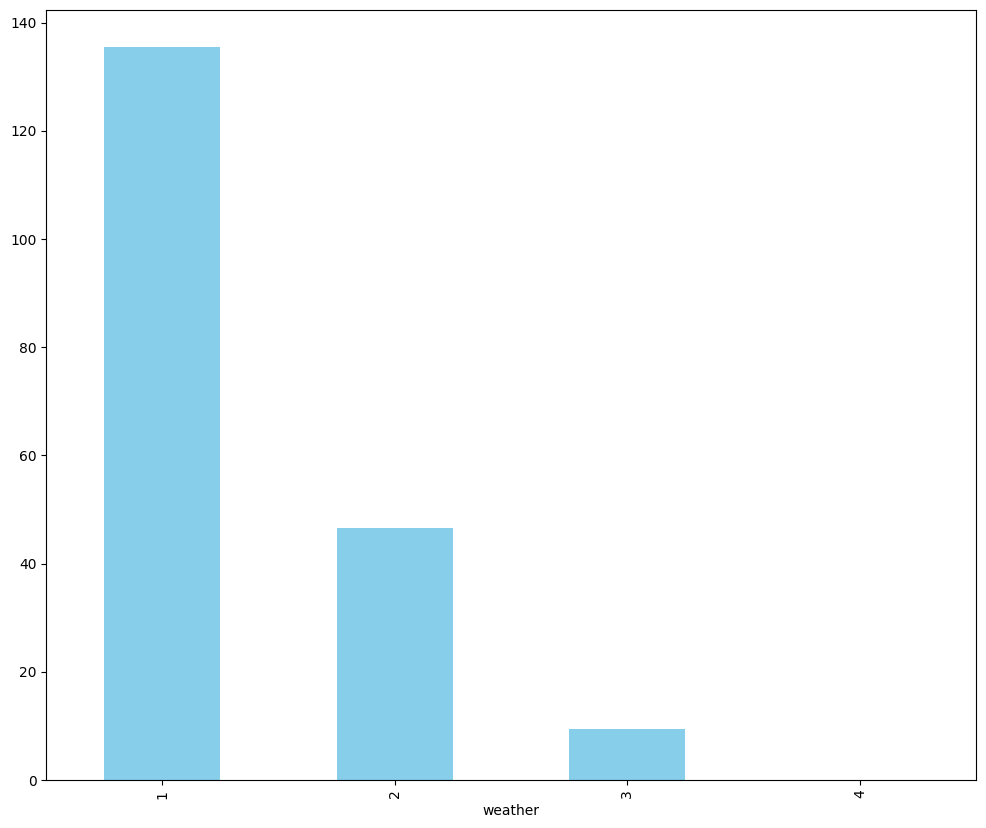

In [128]:
# 가중치를 고려한 날씨별 count값 시각화
fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(1,1,1)
ax = weighted_means.plot(kind='bar',color='skyblue')

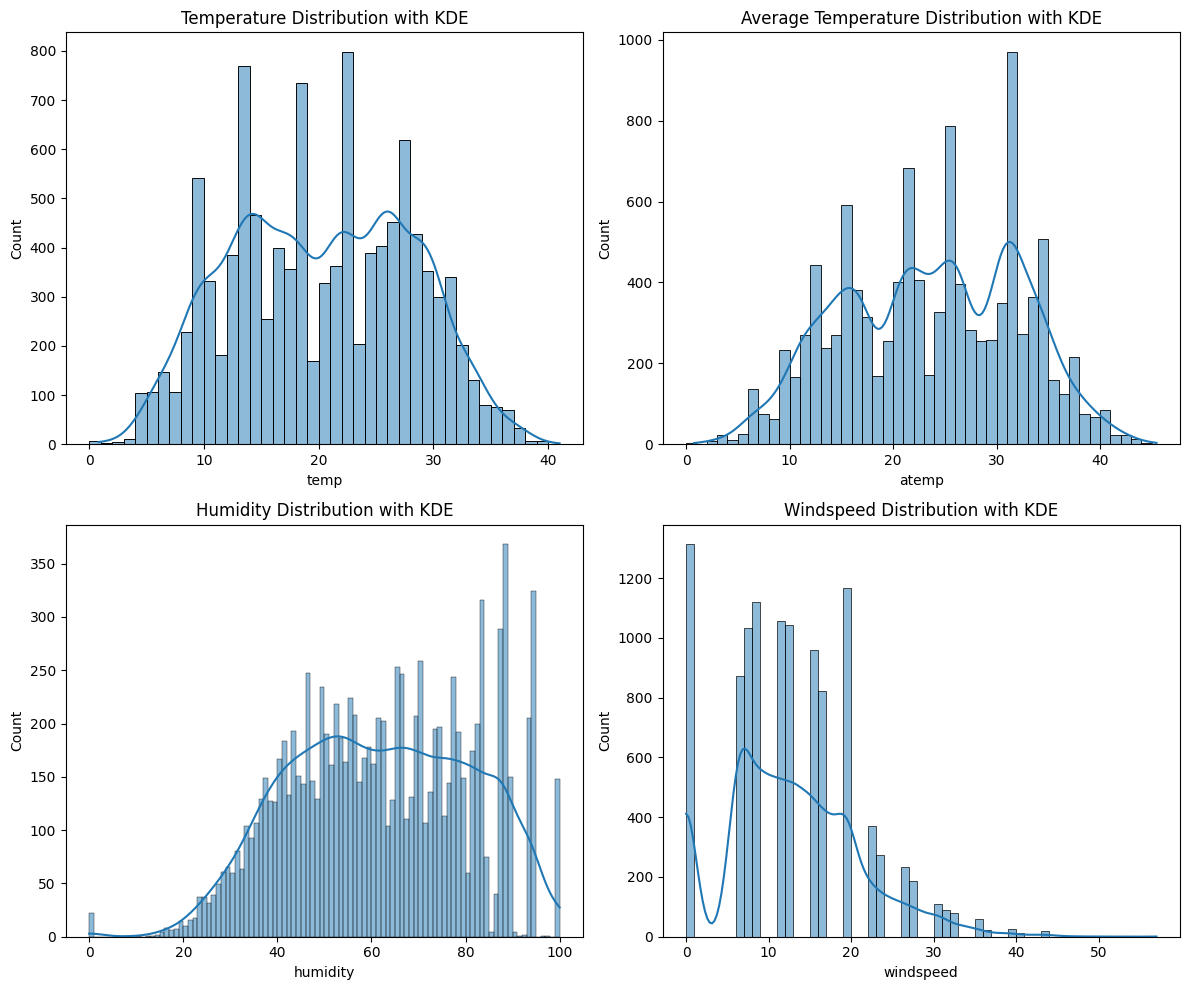

In [129]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. 온도와 count
sns.histplot(train['temp'], bins=range(int(train['temp'].min()), int(train['temp'].max()) + 1), kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution with KDE')

# 2. 평균 온도와 count
sns.histplot(train['atemp'], bins=range(int(train['atemp'].min()), int(train['atemp'].max()) + 1), kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Average Temperature Distribution with KDE')

# 3. 습도와 count
sns.histplot(train['humidity'], bins=range(int(train['humidity'].min()), int(train['humidity'].max()) + 1), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Humidity Distribution with KDE')

# 4. 바람 속도와 count
sns.histplot(train['windspeed'], bins=range(int(train['windspeed'].min()), int(train['windspeed'].max()) + 1), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Windspeed Distribution with KDE')

# Adjusting layout
plt.tight_layout()
plt.show()

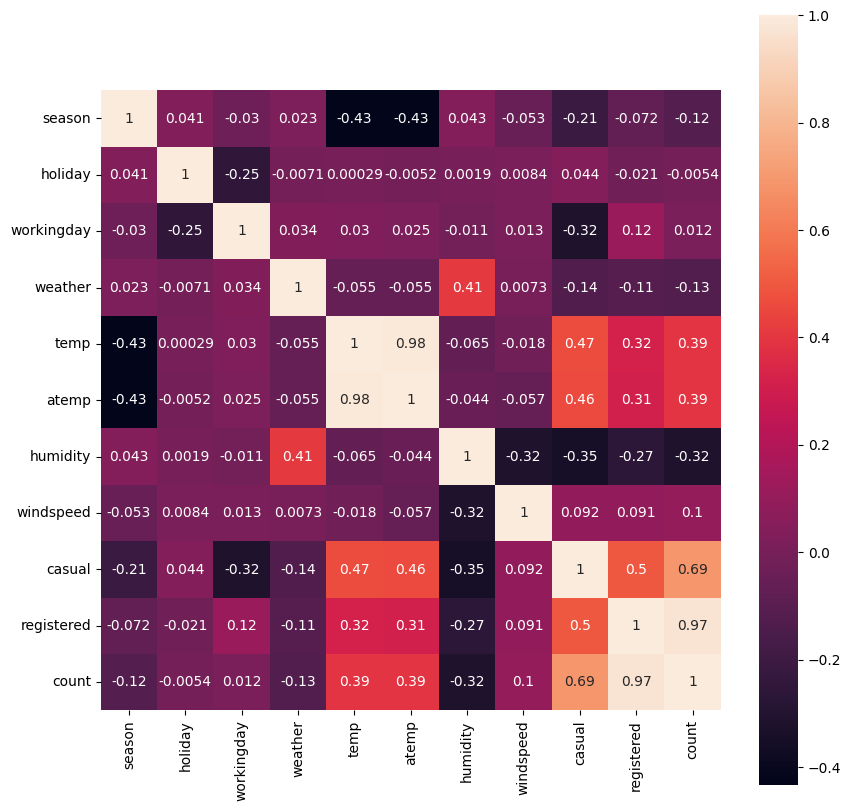

In [130]:
#각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화

fig = plt.figure(figsize=[10,10])
ax = sns.heatmap(train.select_dtypes(include=['float64', 'int64']).corr(),annot=True,square=True)

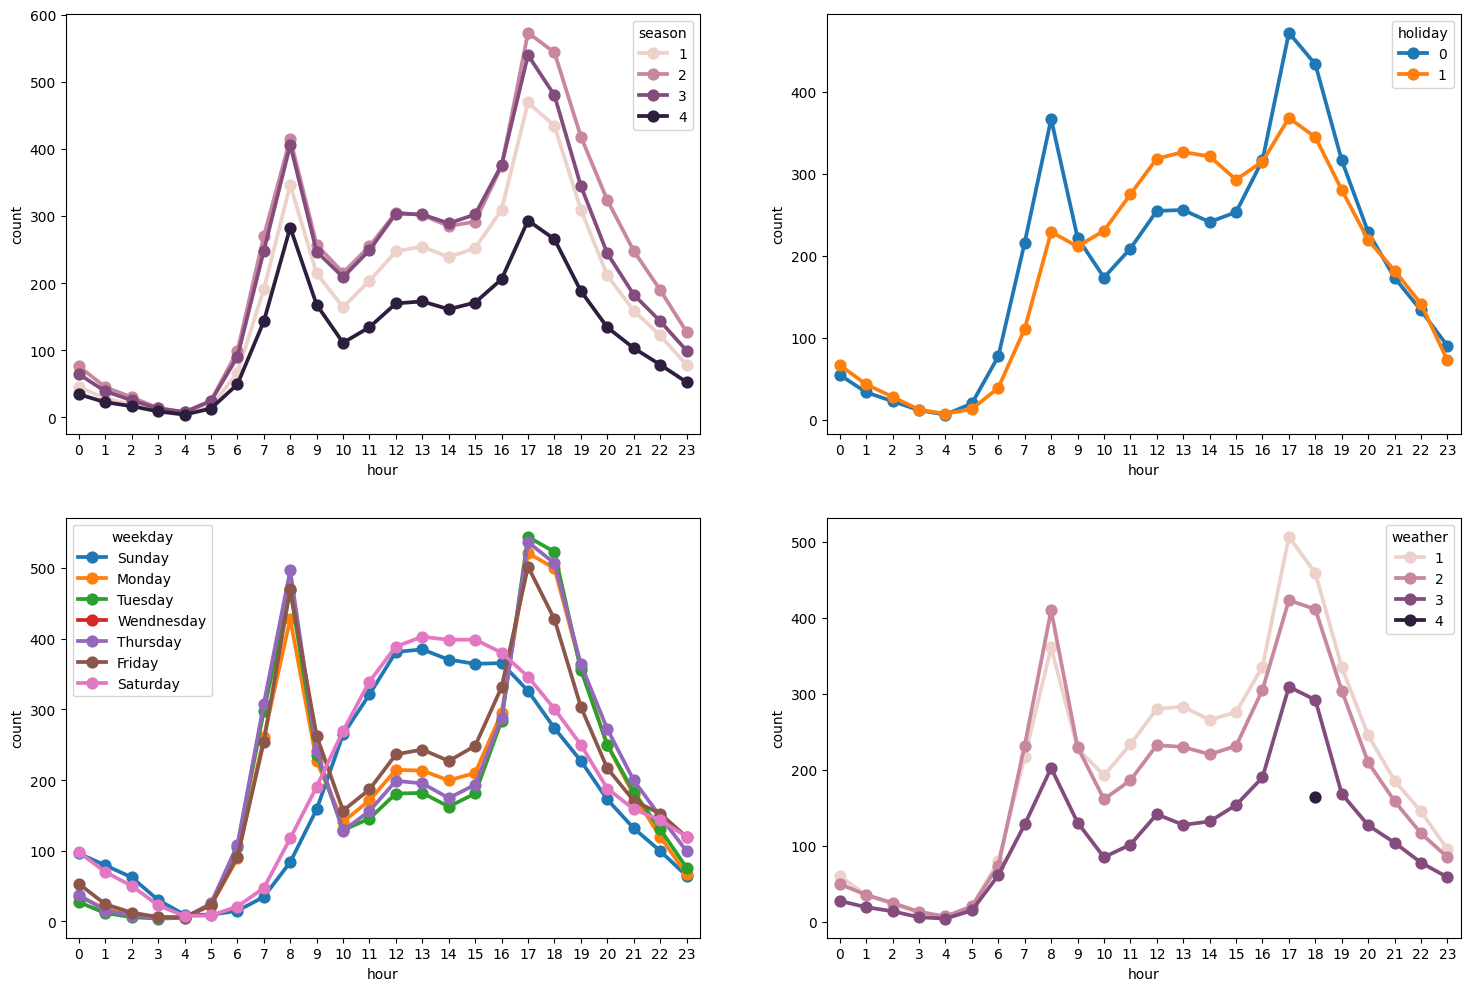

In [131]:
#heatmap 상관관계를 참조하여 이전의 시각화와는 달리 두 개의 서로다른 컬럼이 적용된 count를 시각화해보자

#시간과 계절에 따른 count
fig = plt.figure(figsize=[18,12])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 공휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count  : 휴일은 주로 낮시간대에 많이 타고 고르게 본포, 나머지는 출 퇴근 시간에 많이 탐
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

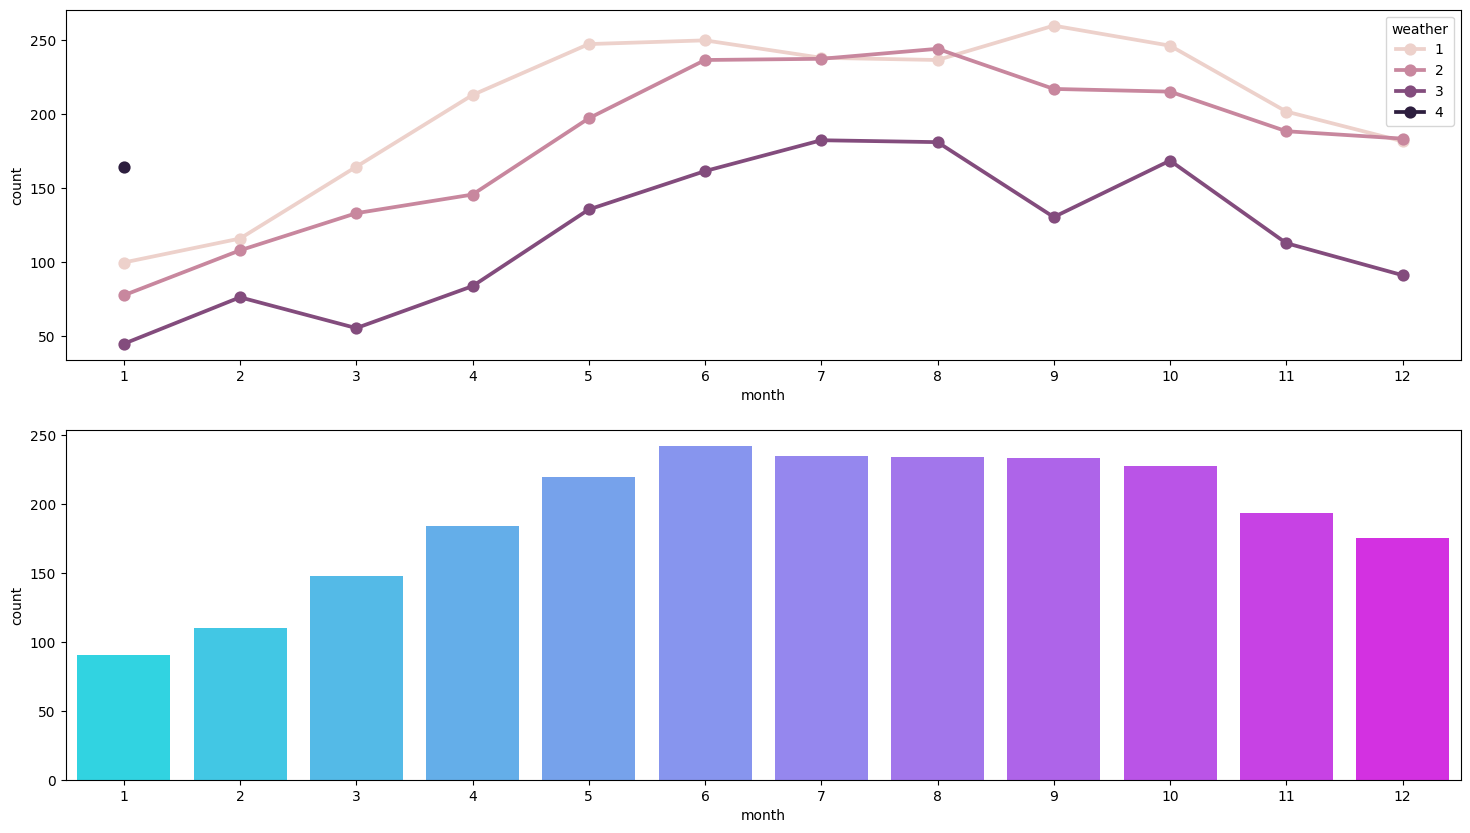

In [132]:
#달과 날씨에 따른 count : 날씨가 좋을 때 대여량이 많음, 여름(6~8)월에 상대적으로 많음
fig = plt.figure(figsize=[18,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())

#달별 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index(),palette='cool')

## windspeed 예측
- 가정 : Windspeed 분포를 표현한 그래프에서 Windspeed가 0인 값들이 많았는데,
- 이는 실제로 0이었던지 or 값을 제대로 측정하지 못해서 0인지 두 개의 경우.
- 후자의 생각을 가지고 데이터를 활용하여 windspeed값을 부여해보자

In [133]:
# windspeed 값 확인하기 - 0인 값이 많음 : 이유 추정 - 측정되지 않은 값은 0으로 표기되었을 수 있음
train.windspeed.value_counts()

windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64

In [134]:
#머신러닝 모델에 훈련시킬 때는 문자열 값은 불가능하기 때문에 문자열을 카테고리화 하고 각각에 해당하는 값을 숫자로 변환해준다

train['weekday']= train.weekday.astype('category')

In [135]:
print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [136]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encoders['weekday'] = LabelEncoder()
train['weekday'] = label_encoders['weekday'].fit_transform(train['weekday'])

In [137]:
train.weekday.value_counts()

weekday
2    1584
3    1579
4    1553
1    1551
6    1551
5    1539
0    1529
Name: count, dtype: int64

In [138]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2,2011,1,1,0,0,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2,2011,1,1,1,0,0
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,1,2,0,0
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2,2011,1,1,3,0,0
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2,2011,1,1,4,0,0


In [139]:
# best model 찾기
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import time

#Windspeed가 0인 데이터프레임
windspeed_0 = train[train.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = train[train.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

X = windspeed_Not0_df
y = windspeed_Not0_series


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinaerRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

param_grid = {
    'LinaerRegression': {},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
}

best_models = {}
for model_name, model in tqdm(models.items(), desc="Training models"):
    print(f"Training {model_name}...")
    
    # Start the timer
    start_time = time.time()
    
    # Perform GridSearchCV with tqdm to show progress
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Predict and evaluate
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    elapsed_time = time.time() - start_time
    
    print(f"{model_name} - Best Params: {grid_search.best_params_}, MSE: {mse}, Time: {elapsed_time:.2f} seconds")
    
best_model_name, best_mse = None, float('inf')

for model_name, model in tqdm(best_models.items(), desc="Evaluating best model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_mse:
        best_model_name = model_name
        best_mse = mse


Training models:   0%|          | 0/5 [00:00<?, ?it/s]

Training LinaerRegression...


Training models:  20%|██        | 1/5 [00:02<00:08,  2.08s/it]

LinaerRegression - Best Params: {}, MSE: 43.985023115683994, Time: 2.08 seconds
Training RandomForest...


Training models:  60%|██████    | 3/5 [00:15<00:09,  4.79s/it]

RandomForest - Best Params: {'max_depth': 20, 'n_estimators': 200}, MSE: 22.26013518432394, Time: 13.35 seconds
Training KNN...
KNN - Best Params: {'n_neighbors': 5}, MSE: 35.16393210789849, Time: 0.11 seconds
Training XGBoost...


Training models:  80%|████████  | 4/5 [00:16<00:03,  3.22s/it]

XGBoost - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 21.60296250783423, Time: 0.83 seconds
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 6126, number of used features: 12
[LightGBM] [Info] Start training from score 14.507343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of data points in the train set: 6126, number of used features: 12
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of test

Training models: 100%|██████████| 5/5 [00:28<00:00,  5.64s/it]


LightGBM - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 21.26534512503532, Time: 11.82 seconds


Evaluating best model: 100%|██████████| 5/5 [00:00<00:00, 49.52it/s]


In [140]:
model_performance = {}

for model_name, model in best_models.items():
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    model_performance[model_name] = {
        'MSE': mse,
        'Best Params': model.get_params()
    }

for model_name, performance in model_performance.items():
    print(f"Model: {model_name}")
    print(f"  - MSE: {performance['MSE']}")
    print(f"  - Best Params: {performance['Best Params']}")
    print("\n")

Model: LinaerRegression
  - MSE: 43.985023115683994
  - Best Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Model: RandomForest
  - MSE: 22.26013518432394
  - Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Model: KNN
  - MSE: 35.16393210789849
  - Best Params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Model: XGBoost
  - MSE: 21.60296250783423
  - Best Params: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample

In [141]:
best_model = best_models[best_model_name] 

predicted_windspeed_0 = best_model.predict(windspeed_0_df)
windspeed_0['windspeed'] = predicted_windspeed_0

train_updated = pd.concat([windspeed_0, windspeed_Not0], axis=0)
train_updated = train_updated.sort_values(by=['datetime'])

Min value of windspeed is 2.7855465696851676


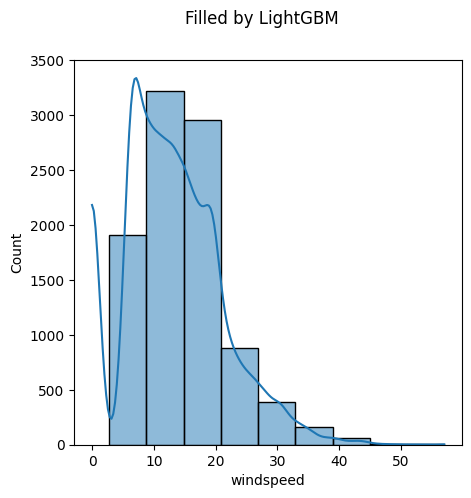

In [142]:
fig = plt.figure(figsize=[5,5])
sns.histplot(train['windspeed'],bins=np.linspace(train_updated['windspeed'].min(),train_updated['windspeed'].max(),10),kde=True)
plt.suptitle(f"Filled by {best_model_name}")
print("Min value of windspeed is {}".format(train_updated['windspeed'].min()))

## LinearRegression 모델 학습 및 예측

In [143]:
train = pd.read_csv('/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/any/bike_train.csv')
test = pd.read_csv('/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/any/bike_test.csv')

combine = pd.concat([train, test], axis=0)

In [144]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['tempDate'] = pd.to_datetime(combine['datetime'])

# min,sec 삭제 - 의미 없음
combine['year'] = combine['tempDate'].dt.year
combine['month'] = combine['tempDate'].dt.month
combine['day'] = combine['tempDate'].dt.day
combine['hour'] = combine['tempDate'].dt.hour

# season 재정의
combine['season'] = combine.month.apply(badToRight)

combine = combine.drop(['tempDate'], axis=1)

combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,Saturday,2011,1,1,4


In [145]:
combine.weekday = combine.weekday.astype('category')

label_encoders['weekday'] = LabelEncoder()
combine['weekday'] = label_encoders['weekday'].fit_transform(combine['weekday'])

In [146]:
# best model 찾기 - windspeed 채우기
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import time

#Windspeed가 0인 데이터프레임
dataWind0 = combine[combine.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
dataWindNot0 = combine[combine.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
dataWind0_df = dataWind0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
dataWindNot0_df = dataWindNot0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
dataWindNot0_series = dataWindNot0['windspeed'] 

X = dataWindNot0_df
y = dataWindNot0_series


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

param_grid = {
    'LinearRegression' : {},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
}

best_models = {}
for model_name, model in tqdm(models.items(), desc="Training models"):
    print(f"Training {model_name}...")
    
    # Start the timer
    start_time = time.time()
    
    # Perform GridSearchCV with tqdm to show progress
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Predict and evaluate
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    elapsed_time = time.time() - start_time
    
    print(f"{model_name} - Best Params: {grid_search.best_params_}, MSE: {mse}, Time: {elapsed_time:.2f} seconds")
    
best_model_name, best_mse = None, float('inf')

for model_name, model in tqdm(best_models.items(), desc="Evaluating best model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_mse:
        best_model_name = model_name
        best_mse = mse


Training models:   0%|          | 0/5 [00:00<?, ?it/s]

Training LinearRegression...
LinearRegression - Best Params: {}, MSE: 43.028613241597824, Time: 0.03 seconds
Training RandomForest...


Training models:  60%|██████    | 3/5 [00:18<00:11,  5.56s/it]

RandomForest - Best Params: {'max_depth': 20, 'n_estimators': 200}, MSE: 21.56788663907854, Time: 18.81 seconds
Training KNN...
KNN - Best Params: {'n_neighbors': 3}, MSE: 33.41436495365314, Time: 0.15 seconds
Training XGBoost...


Training models:  80%|████████  | 4/5 [00:19<00:03,  3.82s/it]

XGBoost - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 21.449218604980114, Time: 0.90 seconds
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 9727, number of used features: 12
[LightGBM] [Info] Start training from score 14.618189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 9727, number of used features: 12
[LightGBM] [Info] Start training from score 14.604939
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total

Training models: 100%|██████████| 5/5 [00:31<00:00,  6.35s/it]


LightGBM - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 21.103591809785097, Time: 11.86 seconds


Evaluating best model: 100%|██████████| 5/5 [00:00<00:00, 32.98it/s]


In [147]:
model_performance = {}

for model_name, model in best_models.items():
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    model_performance[model_name] = {
        'MSE': mse,
        'Best Params': model.get_params()
    }

for model_name, performance in model_performance.items():
    print(f"Model: {model_name}")
    print(f"  - MSE: {performance['MSE']}")
    print(f"  - Best Params: {performance['Best Params']}")
    print("\n")

Model: LinearRegression
  - MSE: 43.028613241597824
  - Best Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Model: RandomForest
  - MSE: 21.56788663907854
  - Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Model: KNN
  - MSE: 33.41436495365314
  - Best Params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


Model: XGBoost
  - MSE: 21.449218604980114
  - Best Params: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsampl

In [148]:
best_model = best_models[best_model_name] 

predicted_windspeed_0 = best_model.predict(dataWind0_df)
dataWind0['windspeed'] = predicted_windspeed_0

combine_updated = pd.concat([dataWind0,dataWindNot0],axis=0)
combine_updated = combine_updated.sort_values(by=['datetime'])

In [149]:
#합쳐진 combine데이터 셋에서 count의 유무로 훈련과 테스트셋을 분리하고 각각을 datetime으로 정렬

train = combine_updated[pd.notnull(combine_updated['count'])].sort_values(by='datetime')
test = combine_updated[~pd.notnull(combine_updated['count'])].sort_values(by='datetime')

In [150]:
from sklearn.linear_model import LinearRegression

features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','weekday', 'year','month','day','hour']
X = train[features]  # 입력 변수
y = train['count']   # 목표 변수 (자전거 대여 수)

# 2. 학습 데이터와 검증 데이터를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

#선형 모델에 우리의 데이터를 학습
lr.fit(X_train,y_train)
#결과 값 도출
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

# RMSE, mse 계산
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mse = mean_squared_error(y_test, y_pred_lr)

# 결과 출력
print(f"RMSE Value For Linear Regression: {rmse_value}")
print(f"MSE Value For Linear Regression: {mse}")

[251.70275988  45.98900086 197.53510713 ... 309.96807368  34.17486118
 243.79642357]
RMSE Value For Linear Regression: 141.28756740203116
MSE Value For Linear Regression: 19962.1767023835


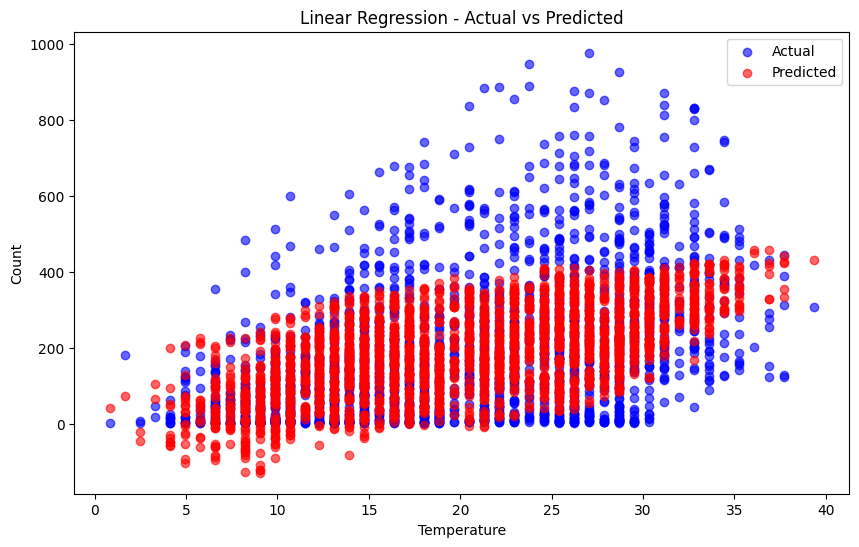

In [151]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기 각각
plt.figure(figsize=(10, 6))
plt.scatter(X_test['temp'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['temp'], y_pred_lr, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()



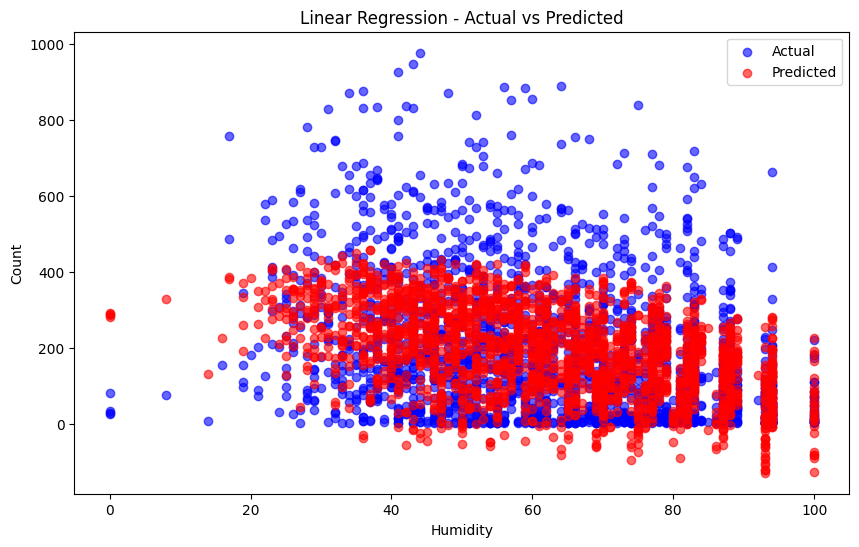

In [152]:
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.figure(figsize=(10, 6))
plt.scatter(X_test['humidity'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['humidity'], y_pred_lr, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()